In [55]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
with open('input/input_15ex.txt') as file:
    lines = [line.rstrip('\n') for line in file]

In [3]:
examp = []
for line in lines:
    row = [int(c) for c in line]
    examp.append(row)

examp = np.array(examp)

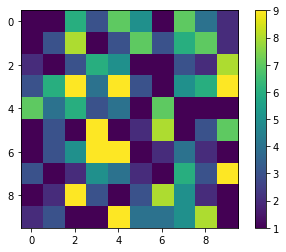

In [5]:
plt.imshow(examp)
plt.colorbar()

In [8]:
examp

array([[1, 1, 6, 3, 7, 5, 1, 7, 4, 2],
       [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
       [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
       [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
       [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
       [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
       [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
       [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
       [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
       [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]])

## solution attempt

In [42]:
np.eye(10, k=-8)[::-1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
for pos in np.where(np.eye(10, k=8)[::-1] == 1):
    print(pos)

[8 9]
[9 8]


In [57]:
map1 = copy.deepcopy(examp)

In [102]:
#for i in range(-8, 10):

for i in range(-8, -6):
    to_check = np.eye(10, k=i)[::-1] == 1
    positions = np.where(to_check)
    pos_row, pos_col = positions
    
    # print(examp[to_check]) # ex: [6, 3, 2]
    # print(positions) # ex: (array([0, 1, 2]), array([2, 1, 0]))
    
    for kpos, node in enumerate(map1[to_check]):
        print(checkNode(node, pos_row[kpos], pos_col[kpos]))

2
2
7
4
3


In [95]:
def checkNode(nodeval, pos_row, pos_col):
    totvalue = 999
    
    # get from left and up positions
    pre_left_pos = (pos_row, pos_col - 1)
    pre_up_pos = (pos_row - 1, pos_col)
    
    # get left pos value
    if -1 in pre_left_pos:
        pre_left = 999
    else:
        pre_left = map1[pre_left_pos]
    
    # get up pos value
    if -1 in pre_up_pos:
        pre_up = 999
    else:
        pre_up = map1[pre_up_pos]
    
    post_left = pre_left + nodeval
    post_up = pre_up + nodeval
    
    totval = min(totvalue, post_left, post_up)
    
    return totval

In [99]:
assert checkNode(3, 1, 1) == 4
assert checkNode(6, 0, 2) == 7